In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas_datareader as pdr
from datetime import datetime
#!pip install yfinance
import yfinance as yf
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.stattools import adfuller

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = yf.download("ASTS", start="2023-10-23", end="2024-10-23")

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ASTS,ASTS,ASTS,ASTS,ASTS,ASTS
Date,,,,,,
2023-10-23 00:00:00+00:00,2.74,2.74,2.92,2.730,2.92,3054400
2023-10-24 00:00:00+00:00,2.87,2.87,3.05,2.800,2.80,1211800
2023-10-25 00:00:00+00:00,2.92,2.92,3.01,2.845,3.00,1864900
2023-10-26 00:00:00+00:00,3.25,3.25,3.33,2.940,2.94,2201800
2023-10-27 00:00:00+00:00,3.05,3.05,3.41,3.040,3.28,1145300


In [3]:
print(data.shape)

(252, 6)


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-10-23 00:00:00+00:00 to 2024-10-22 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, ASTS)  252 non-null    float64
 1   (Close, ASTS)      252 non-null    float64
 2   (High, ASTS)       252 non-null    float64
 3   (Low, ASTS)        252 non-null    float64
 4   (Open, ASTS)       252 non-null    float64
 5   (Volume, ASTS)     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB
None


In [6]:
corr_matrix = data.corr()
corr_matrix

,Price,Adj Close,Close,High,Low,Open,Volume
,Ticker,ASTS,ASTS,ASTS,ASTS,ASTS,ASTS
Price,Ticker,,,,,,
Adj Close,ASTS,1.000000,1.000000,0.998251,0.995719,0.993257,0.478365
Close,ASTS,1.000000,1.000000,0.998251,0.995719,0.993257,0.478365
High,ASTS,0.998251,0.998251,1.000000,0.995340,0.994888,0.490615
Low,ASTS,0.995719,0.995719,0.995340,1.000000,0.998293,0.432667
Open,ASTS,0.993257,0.993257,0.994888,0.998293,1.000000,0.439836
Volume,ASTS,0.478365,0.478365,0.490615,0.432667,0.439836,1.000000


<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

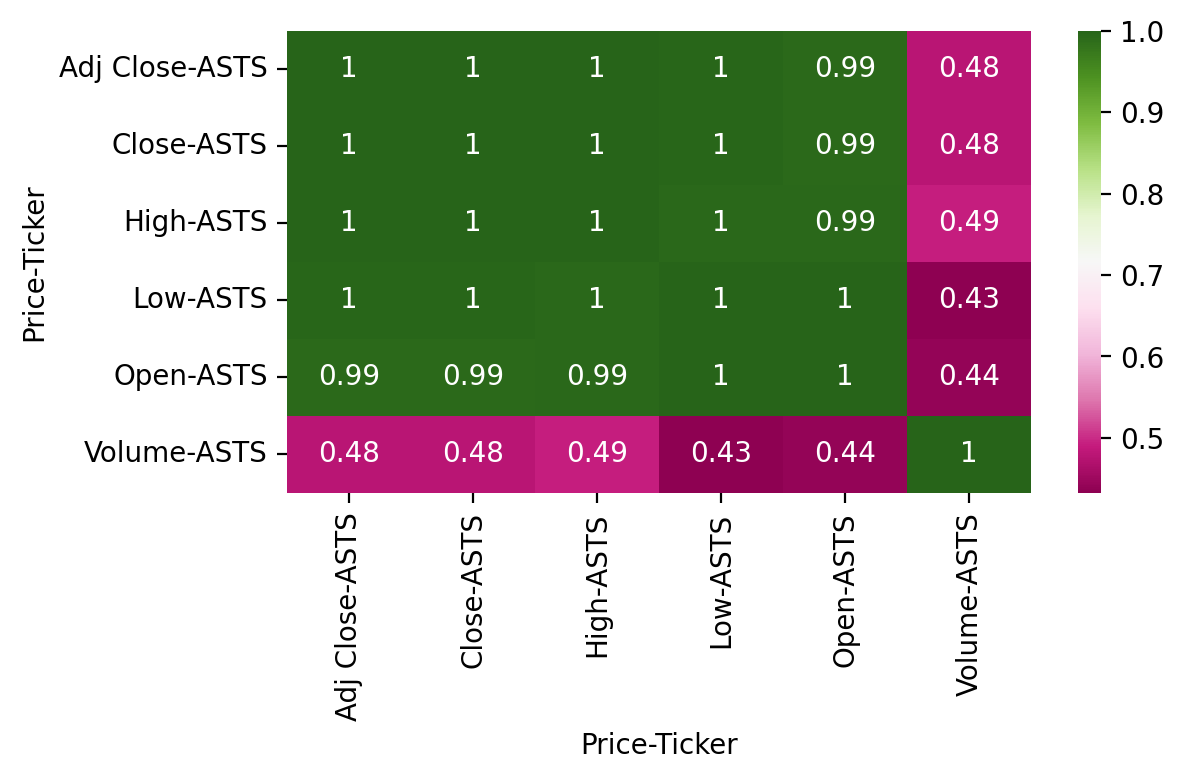

In [7]:
figure(figsize=(6, 3), dpi=200)
sns.heatmap(corr_matrix, annot = True, cmap="PiYG")

In [11]:
data['Close'].mean()[0]

/tmp/ipykernel_764/2713833744.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Close'].mean()[0]


10.34043650589292

/tmp/ipykernel_764/3065719454.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axhline(data['Close'].mean()[0], color='black', linestyle='--')


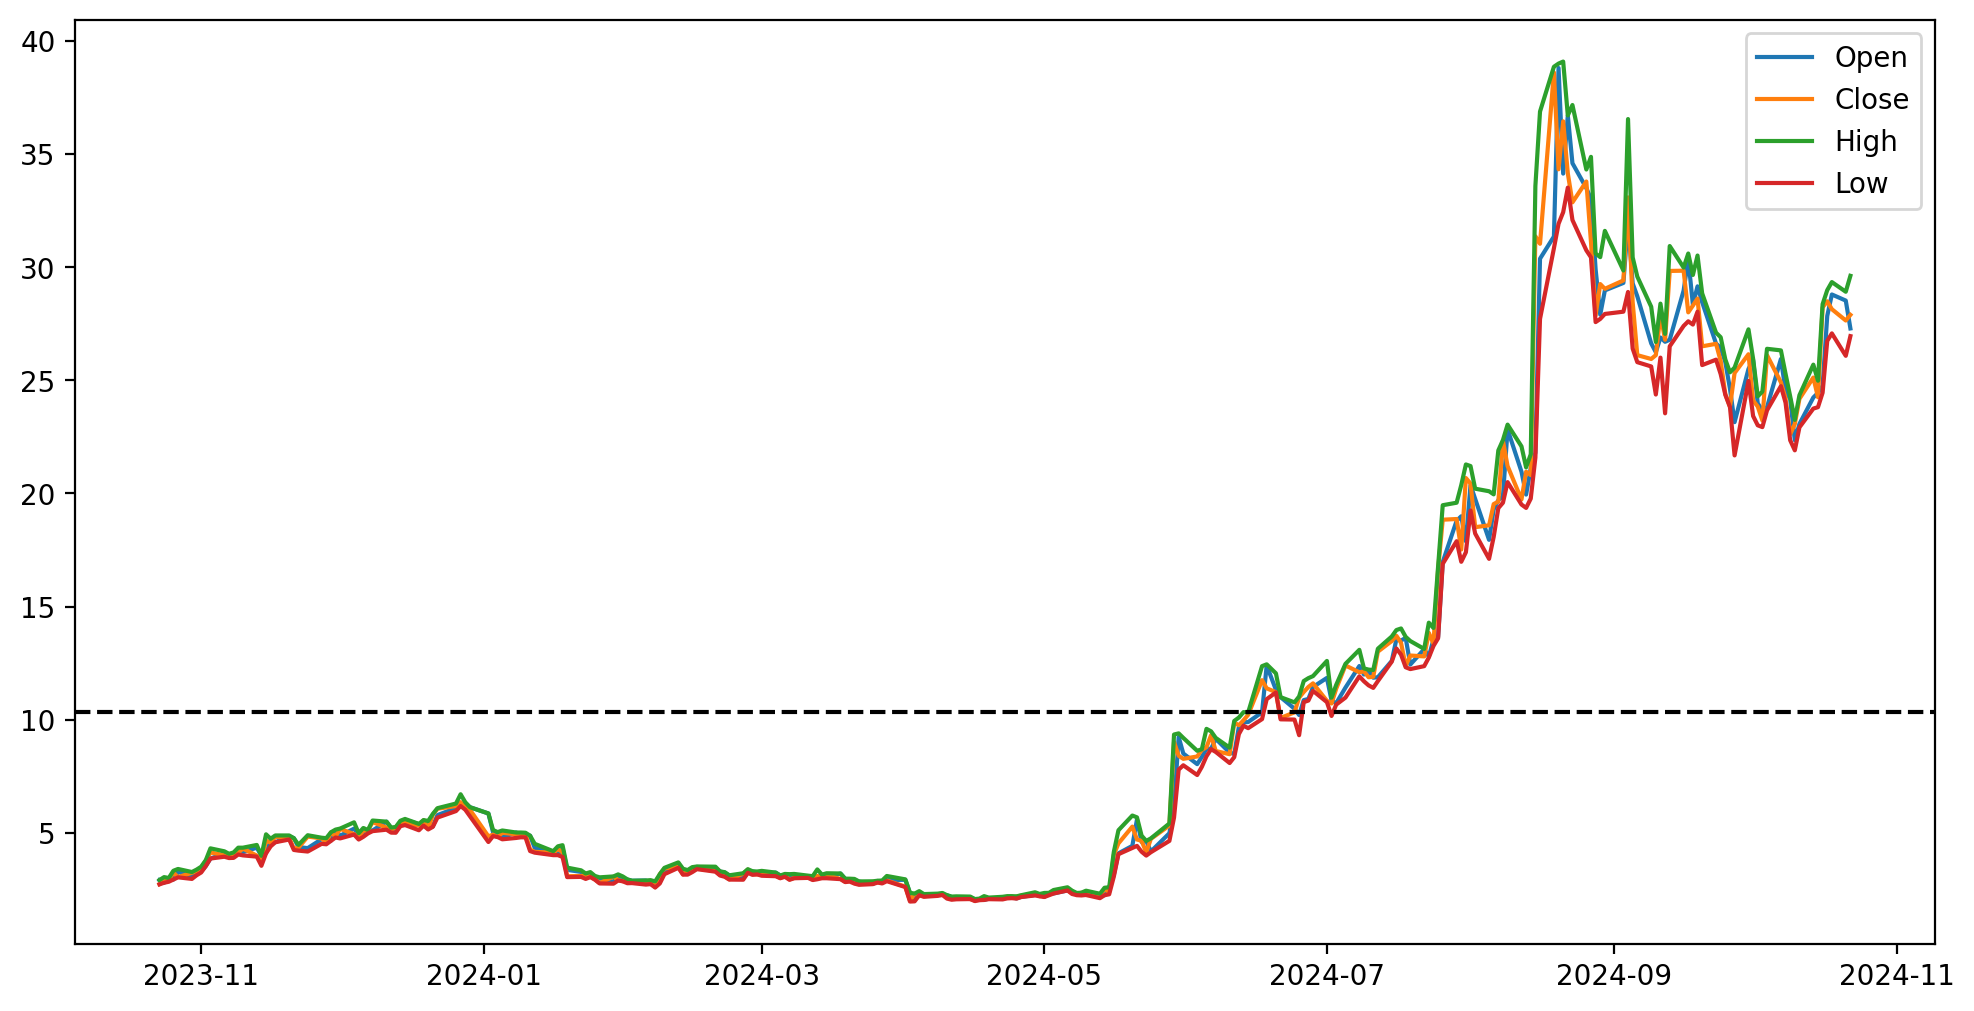

In [14]:
figure(figsize=(12, 6), dpi=200)
plt.plot(data['Open'], label="Open")
plt.plot(data['Close'], label="Close")
plt.plot(data['High'], label="High")
plt.plot(data['Low'], label="Low")
plt.axhline(data['Close'].mean()[0], color='black', linestyle='--')
plt.legend()